In [16]:
import pandas as pd
import nltk
import matplotlib
import matplotlib.pyplot as plt

In [17]:
df=pd.read_csv('Safety_Hotline_Tickets.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6066 entries, 0 to 6065
Data columns (total 8 columns):
Item_ID             6066 non-null int64
Date_Created        6066 non-null object
Description         6065 non-null object
Problem_Location    6019 non-null object
X                   6066 non-null float64
Y                   6066 non-null float64
Longitude           6066 non-null float64
Latitude            6066 non-null float64
dtypes: float64(4), int64(1), object(3)
memory usage: 379.2+ KB


In [18]:
df.head()

,Item_ID,Date_Created,Description,Problem_Location,X,Y,Longitude,Latitude
0,212361,1/10/2008 0:00,Request signal.,SE 55TH AVE & SE BELMONT ST,7662127.698,681495.143,-122.606820,45.516641
1,225059,3/13/2008 0:00,He requested a Control Plan to be drawn up by ...,SW 4TH AVE & SW STARK ST,7644573.924,683377.729,-122.675475,45.520526
2,225063,3/13/2008 0:00,Wants to know why her street is being torn up ...,2314 SE 24TH AVE,7653283.000,677827.000,-122.640934,45.505946
3,226609,3/21/2008 0:00,There are only 3 stop signs at intersection an...,SE 8TH AVE & SE WOODWARD ST,7648923.134,676541.521,-122.657800,45.502103
4,226619,3/21/2008 0:00,Requested that the diversion for traffic in he...,SE 58TH AVE & SE HAWTHORNE BLVD,7662910.091,679723.179,-122.603589,45.511838


In [19]:
df['DATE'] =pd.to_datetime(df['Date_Created'])

In [20]:
df.head()

,Item_ID,Date_Created,Description,Problem_Location,X,Y,Longitude,Latitude,DATE
0,212361,1/10/2008 0:00,Request signal.,SE 55TH AVE & SE BELMONT ST,7662127.698,681495.143,-122.606820,45.516641,2008-01-10
1,225059,3/13/2008 0:00,He requested a Control Plan to be drawn up by ...,SW 4TH AVE & SW STARK ST,7644573.924,683377.729,-122.675475,45.520526,2008-03-13
2,225063,3/13/2008 0:00,Wants to know why her street is being torn up ...,2314 SE 24TH AVE,7653283.000,677827.000,-122.640934,45.505946,2008-03-13
3,226609,3/21/2008 0:00,There are only 3 stop signs at intersection an...,SE 8TH AVE & SE WOODWARD ST,7648923.134,676541.521,-122.657800,45.502103,2008-03-21
4,226619,3/21/2008 0:00,Requested that the diversion for traffic in he...,SE 58TH AVE & SE HAWTHORNE BLVD,7662910.091,679723.179,-122.603589,45.511838,2008-03-21


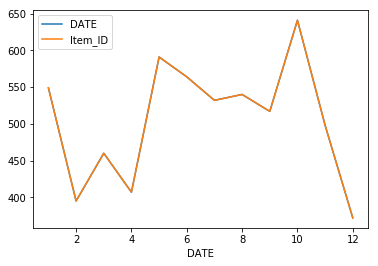

In [38]:
#what are the most common months to call
df[["DATE", "Item_ID"]].groupby([df["DATE"].dt.month]).count().plot()

In [58]:
#show by month for each year
df.groupby(['DATE']).unstack().plot()

AttributeError: Cannot access callable attribute 'unstack' of 'DataFrameGroupBy' objects, try using the 'apply' method

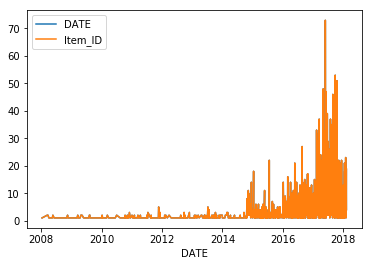

In [37]:
#all calls over time
df[["DATE", "Item_ID"]].groupby([df["DATE"].dt.date]).count().plot()


In [61]:
#top months for commenting on
df['DATE'].groupby([df["DATE"].dt.year, df["DATE"].dt.month]).agg('count').nlargest(10)

DATE  DATE
2017  6       400
      5       373
      10      345
      7       322
      8       306
      3       269
      9       248
2018  1       229
2017  11      216
      4       215
Name: DATE, dtype: int64

In [62]:
#top days
#future idea, combine with weather?
df['DATE'].groupby([df["DATE"].dt.year, df["DATE"].dt.month, df["DATE"].dt.day]).agg('count').nlargest(10)

DATE  DATE  DATE
2017  5     30      73
      9     27      53
      10    17      51
      5     4       48
      6     9       47
      8     28      46
      10    16      40
      6     19      39
            23      39
      3     17      37
Name: DATE, dtype: int64